In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "../Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_file = "../Instructions/Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_file)
df_clinical = pd.read_csv(clinical_trial_file)

# Combine the data into a single dataset
df_combine = df_clinical.merge(df_mouse, on = "Mouse ID", how = "inner")
df_combine = df_combine.sort_values(by=["Timepoint", "Tumor Volume (mm3)"])
# Display the data table for preview
df_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
10,f932,0,45.0,0,Ketapril
11,g107,0,45.0,0,Ketapril
19,a457,0,45.0,0,Ketapril
22,c819,0,45.0,0,Ketapril


In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gb = df_combine.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_tumor_df = gb.mean()

# Preview DataFrame
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gb = df_combine.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
sem_tumor_df = gb.sem()
sem_tumor_df = sem_tumor_df.reset_index()

# Preview DataFrame
sem_tumor_df = sem_tumor_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
sem_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = mean_tumor_df.pivot(index = "Timepoint", columns = "Drug")
sem_tumor_pivot = sem_tumor_df.pivot(index = "Timepoint", columns = "Drug")
# Preview that Reformatting worked
mean_tumor_pivot.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol   
Timepoint                                                          
0          45.000000  45.000000  45.000000  45.000000  45.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818   
10         49.423329  49.101541  42.531957  49.463844  48.689881   
15         51.359742  51.067318  41.495061  51.529409  50.779059   
20         54.364417  53.346737  40.238325  54.067395  53.170334   

          Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

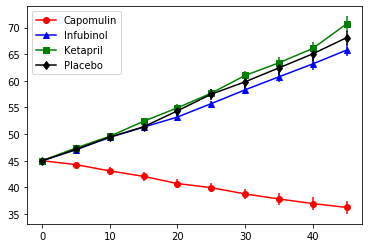

In [12]:
# Generate the Plot (with Error Bars)
times = []
for row in sem_tumor_pivot.index:
    times.append(row)
x_axis = times


plt.plot( x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Capomulin"], marker='o', markerfacecolor='red', color='red', label = "Capomulin")
plt.plot( x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Infubinol"], marker='^', markerfacecolor='blue', color='blue', label = "Infubinol")
plt.plot( x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Ketapril"], marker='s', markerfacecolor='green', color='green', label = "Ketapril")
plt.plot( x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Placebo"], marker='d', markerfacecolor='black', color='black', label = "Placebo")

plt.errorbar(x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Capomulin"], yerr = sem_tumor_pivot["Tumor Volume (mm3)"]["Capomulin"], fmt = ' ', color = "red")
plt.errorbar(x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Infubinol"], yerr = sem_tumor_pivot["Tumor Volume (mm3)"]["Infubinol"], fmt = ' ', color = "blue")
plt.errorbar(x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Ketapril"], yerr = sem_tumor_pivot["Tumor Volume (mm3)"]["Ketapril"], fmt = ' ', color = "green")
plt.errorbar(x_axis, mean_tumor_pivot["Tumor Volume (mm3)"]["Placebo"], yerr = sem_tumor_pivot["Tumor Volume (mm3)"]["Placebo"], fmt = ' ', color = "black")

plt.legend(loc='upper left')
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

plt.show()
# Save the Figure



In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# This is literally stored above in mean_tumor_df
mean_tumor_df.head()
# Convert to DataFrame

# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
gb = df_combine.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
sem_metastatic_df = gb.sem()
sem_metastatic_df = sem_metastatic_df.reset_index()

# Preview DataFrame
sem_metastatic_df = sem_metastatic_df[["Drug", "Timepoint", "Metastatic Sites"]]
sem_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = mean_tumor_df.pivot(index = "Timepoint", columns = "Drug")
sem_metastatic_pivot = sem_metastatic_df.pivot(index = "Timepoint", columns = "Drug")
# Preview that Reformatting worked
mean_tumor_pivot.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol   
Timepoint                                                          
0          45.000000  45.000000  45.000000  45.000000  45.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818   
10         49.423329  49.101541  42.531957  49.463844  48.689881   
15         51.359742  51.067318  41.495061  51.529409  50.779059   
20         54.364417  53.346737  40.238325  54.067395  53.170334   

          Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

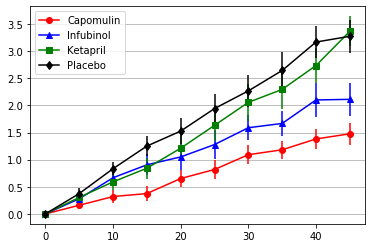

In [17]:
# Generate the Plot (with Error Bars)
times = []
for row in sem_metastatic_pivot.index:
    times.append(row)
x_axis = times


plt.plot( x_axis, mean_tumor_pivot["Metastatic Sites"]["Capomulin"], marker='o', markerfacecolor='red', color='red', label = "Capomulin")
plt.plot( x_axis, mean_tumor_pivot["Metastatic Sites"]["Infubinol"], marker='^', markerfacecolor='blue', color='blue', label = "Infubinol")
plt.plot( x_axis, mean_tumor_pivot["Metastatic Sites"]["Ketapril"], marker='s', markerfacecolor='green', color='green', label = "Ketapril")
plt.plot( x_axis, mean_tumor_pivot["Metastatic Sites"]["Placebo"], marker='d', markerfacecolor='black', color='black', label = "Placebo")

plt.errorbar(x_axis, mean_tumor_pivot["Metastatic Sites"]["Capomulin"], yerr = sem_metastatic_pivot["Metastatic Sites"]["Capomulin"], fmt = ' ', color = "red")
plt.errorbar(x_axis, mean_tumor_pivot["Metastatic Sites"]["Infubinol"], yerr = sem_metastatic_pivot["Metastatic Sites"]["Infubinol"], fmt = ' ', color = "blue")
plt.errorbar(x_axis, mean_tumor_pivot["Metastatic Sites"]["Ketapril"], yerr = sem_metastatic_pivot["Metastatic Sites"]["Ketapril"], fmt = ' ', color = "green")
plt.errorbar(x_axis, mean_tumor_pivot["Metastatic Sites"]["Placebo"], yerr = sem_metastatic_pivot["Metastatic Sites"]["Placebo"], fmt = ' ', color = "black")

plt.legend(loc='upper left')
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True
# Save the Figure
